# Abstract

A random forest is a meta estimator that fits a number of decision tree classifiers or regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  
The fundamental idea behind a random forest is to **combine many decision trees into a single model**. Individually, predictions made by decision trees may not be accurate, but combined together, **the predictions will be closer to the mark on average**.

# Theory

Random forest is **constructed by many decision trees, and their trees use random sample data sets individually**.
Note, there data is sampled from origin features randomly and this way   forgive duplication. So, some data may be not used . Not used data is called **OOB (Out of Bag)**.  

These process is called as **bootstrap sampling (bagging)**. Bootstrap sampling increases diversity in the forest leading to more robust overall predictions.  


# Boruta

https://aotamasaki.hatenablog.com/entry/2019/01/05/195813

# Imprementation

## Basics

In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

In [43]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75)

In [44]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RMSE :  3.1299111959428156


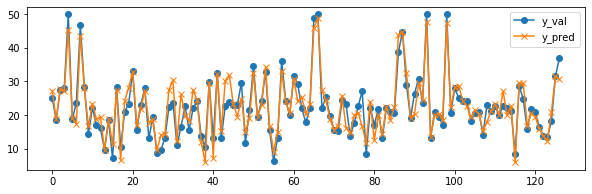

In [49]:
y_pred = model.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : ', rmse)

fig, ax = plt.subplots(facecolor='w', figsize=(10,3))
ax.plot(y_val, marker = 'o', label='y_val')
ax.plot(y_pred, marker = 'x', label='y_pred')
ax.legend()
plt.show()

[0.01913307 0.00120699 0.00854434 0.00275559 0.01817813 0.32378022
 0.00988392 0.07686858 0.00778461 0.01257456 0.01686605 0.00916645
 0.49325749]


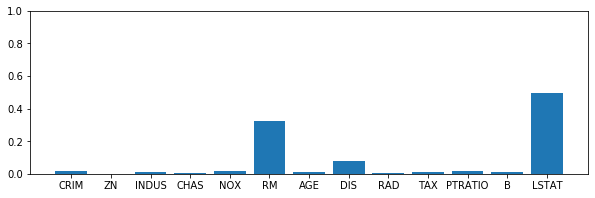

In [50]:
feature_importances = model.feature_importances_
print(feature_importances)

plt.figure(figsize=(10, 3))
plt.ylim([0, 1])
y = feature_importances
x = np.arange(len(y))
plt.bar(x, y, align="center")
plt.xticks(x, boston['feature_names'])
plt.show()

## Advances

# References

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
https://funatsu-lab.github.io/open-course-ware/machine-learning/random-forest/  
